# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Barker Ambiguity Function
***

Referring to Section 8.7.1, a common set of binary phase codes for radar applications is Barker codes, which have several unique properties.  The time sidelobe level of the normalized ambiguity function is $1/N$, where $N$ is the length of the code.  The ambiguity function has a length of $2N\tau_n$, the main lobe has a width of $2\tau_n$, and there are $(N-1)/2$ sidelobes on either side of the main lobe.  There are only seven known Barker codes, and these are given in Table 8.1.

While these are the only known Barker codes, much research has been performed to find longer binary phase codes with low time sidelobe levels.  Although the time sidelobe levels are not $1/N$ as with the Barker codes, some codes have been found to have quite small sidelobe levels.  A Barker code of length $4$ is illustrated in Figure 8.20.  Another approach to obtain longer codes is to combine or embed one code within another.  For example, a Barker code of length $5$ may be used with a Barker code of length $3$ to give (Equation 8.71)

\begin{equation}
    B_{MN} = [\; \; 0\;\; 0\;\; 0\;\; \pi\;\; 0\,,   \; 0\;\; 0\;\; 0\;\; \pi\;\; 0\,,   \; \pi\;\; \pi\;\; \pi\;\; 0\;\; \pi\;].
\end{equation}

The compression ratio of the combined Barker code is $MN$.  However, the sidelobe level of the combined code is not $1/MN$.  When using combined Barker codes, a number of sidelobes may be reduced to zero if the matched filter is followed by a linear transversal filter.
***

Begin by getting the library path

In [1]:
import lib_path

Set the chip width (s) and the code length (2, 3, 4, 5, 7, 11, 13)

In [2]:
chip_width = 0.1

code_length = 5

Set the Barker code

In [3]:
if code_length == 2:

    code = [1, -1]

elif code_length == 3:

    code = [1, 1, -1]

elif code_length == 4:

    code = [1, 1, -1, 1]

elif code_length == 5:

    code = [1, 1, 1, -1, 1]

elif code_length == 7:

    code = [1, 1, 1, -1, -1, 1, -1]

elif code_length == 11:

    code = [1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1]

elif code_length == 13:

    code = [1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1]

Calculate the ambiguity function for the Barker code

In [4]:
from Libs.ambiguity.ambiguity_function import phase_coded_wf


ambiguity, time_delay, doppler_frequency = phase_coded_wf(code, chip_width)

Display the zero-Doppler cut, the zero-range cut, and the 2D contour plot using the `matplotlib` routines

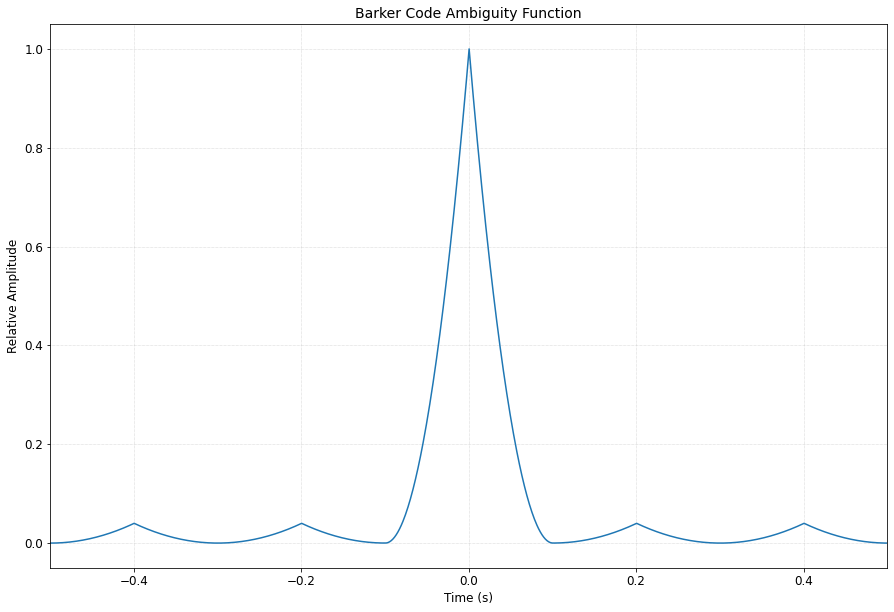

In [5]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Plot the ambiguity function

plt.plot(time_delay, ambiguity[round(len(doppler_frequency) / 2)], '')



# Set the time axis limits

plt.xlim(-len(code) * chip_width, len(code) * chip_width)



# Set the x and y axis labels

plt.xlabel("Time (s)", size=12)

plt.ylabel("Relative Amplitude", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the plot title and labels

plt.title('Barker Code Ambiguity Function', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)

Create the zero-range cut

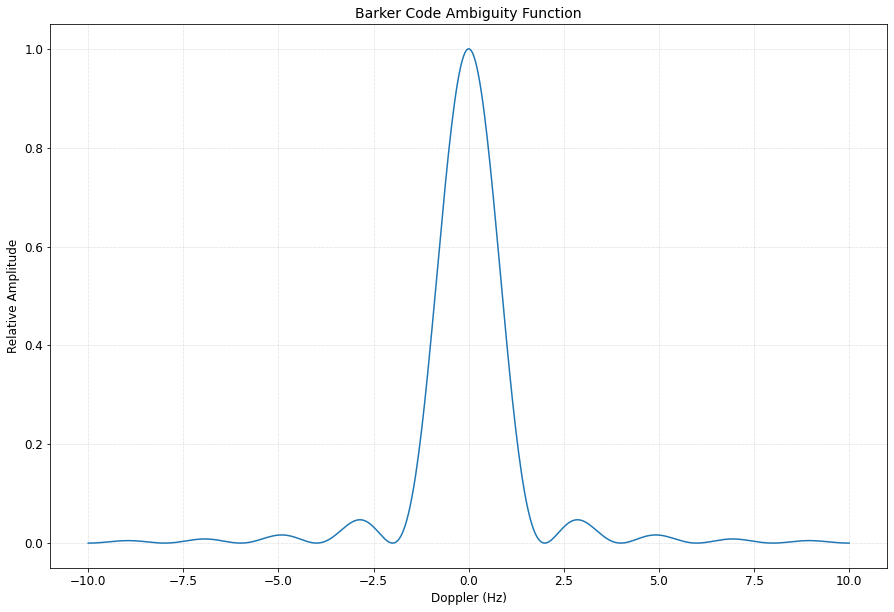

In [6]:
 # Plot the ambiguity function

plt.plot(doppler_frequency,  ambiguity[:, round(len(time_delay) / 2)], '')



# Set the x and y axis labels

plt.xlabel("Doppler (Hz)", size=12)

plt.ylabel("Relative Amplitude", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the plot title and labels

plt.title('Barker Code Ambiguity Function', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)

Create the two-dimensional contour plot

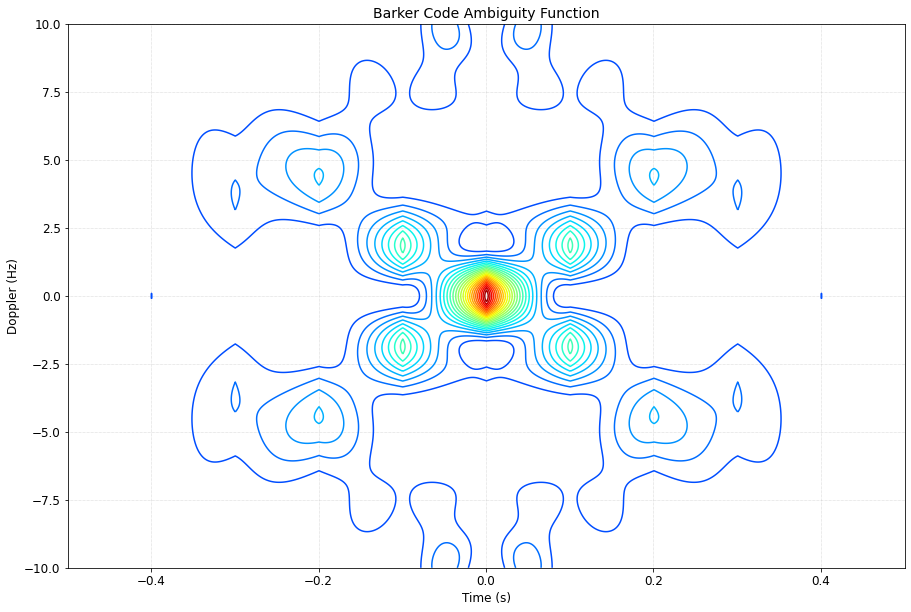

In [7]:
from numpy import meshgrid


# Create the grid

t, f = meshgrid(time_delay, doppler_frequency)



# Plot the ambiguity function

plt.contour(t, f, ambiguity, 30, cmap='jet', vmin=-0.2, vmax=1.0)



# Set the time axis limits

plt.xlim(-len(code) * chip_width, len(code) * chip_width)



# Set the x and y axis labels

plt.xlabel("Time (s)", size=12)

plt.ylabel("Doppler (Hz)", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Set the plot title and labels

plt.title('Barker Code Ambiguity Function', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)